In [1]:
from resolved_pol import ResolvedPol

In [2]:
object = "W0116-0505"
band = "R_SPECIAL"
mjds = [59135, 59136, 59137]

star_ex_ref = 1398 #1394 #1574
star_ey_ref = 413 #629 #81

#We'll use the source itself for pointing offsets. 
source_ex_ref =  1021.5
source_ey_ref = 70.0

mkdir: stamps: File exists


-0.1 -90.6


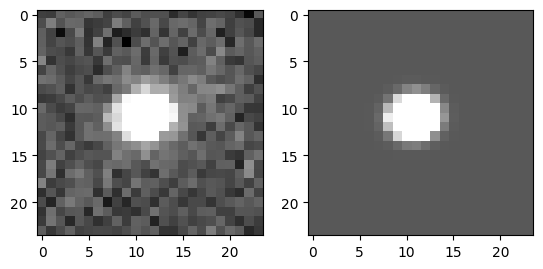

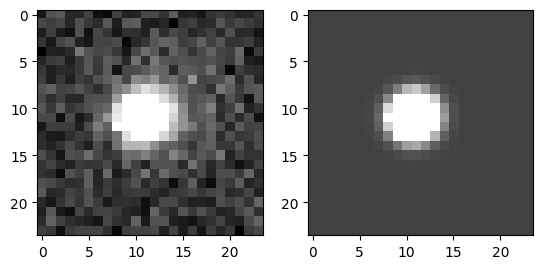

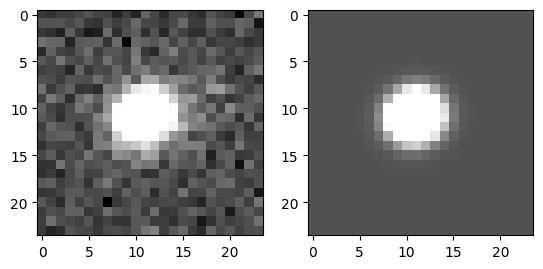

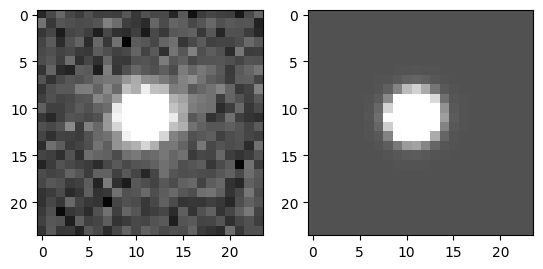

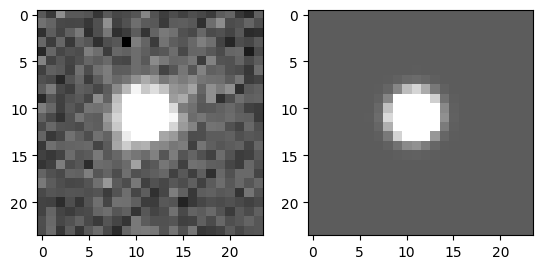

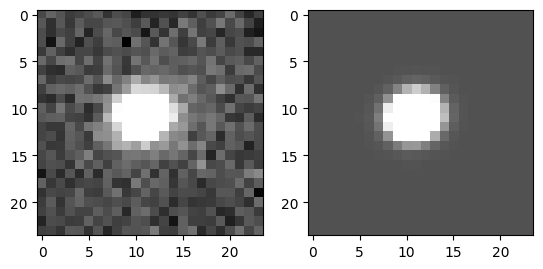

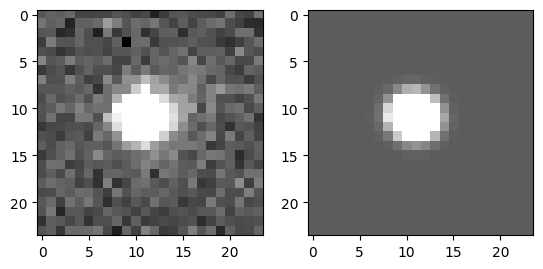

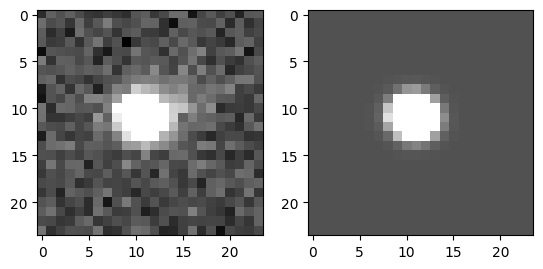

[0.695143   0.82615223 0.94744701 0.78505413 0.74505355 0.82218891
 0.76101546 0.71078655]
Target FWHM:  1.0
1.2114151254588748 0.30527661161563646


0.9494995966065886 0.23927389834486032


0.5391049010466478 0.13585443506375525


1.0438353126142434 0.26304649877878933


1.1240111034950189 0.28325079808074477


0.9592191870974414 0.24172323514855523


1.0932216428418318 0.2754918539961416


1.1853562498487589 0.2987097749618872


/Users/rjassef/Impol_Blue_HotDOGs/Impol_BHDs_repo/W0204-0506_resolved/resolved_pol.py:220: RuntimeWarning: invalid value encountered in divide
  F = (fo-fe)/(fo+fe)
mkdir: stamps: File exists


-0.1 -90.5


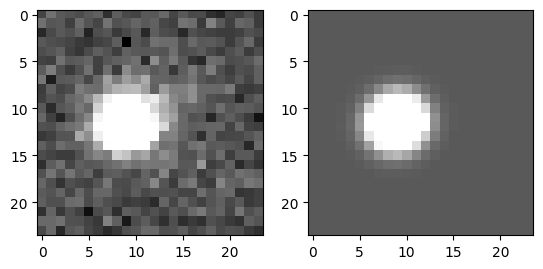

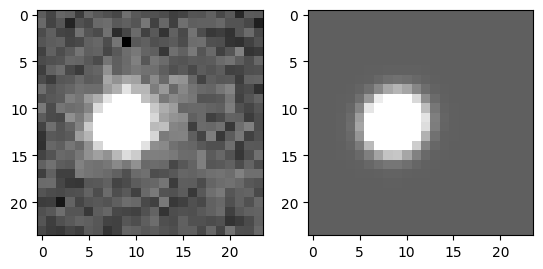

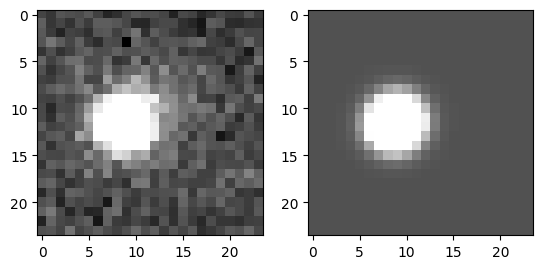

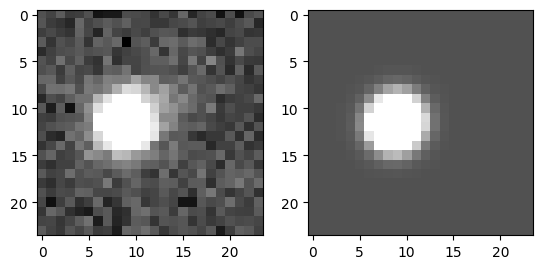

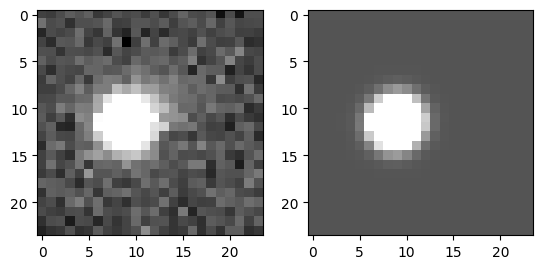

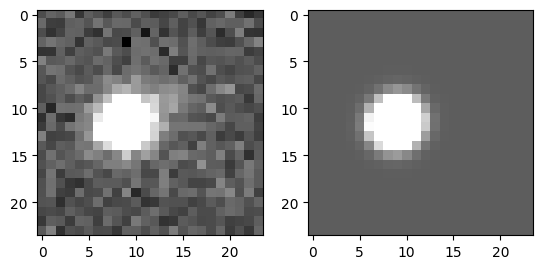

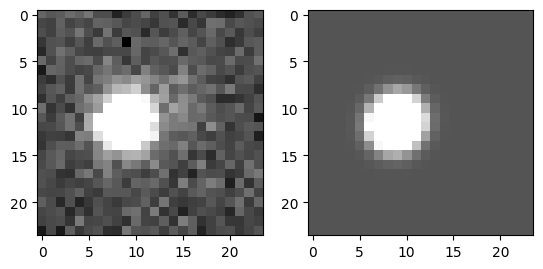

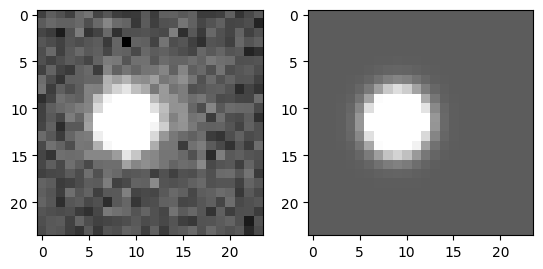

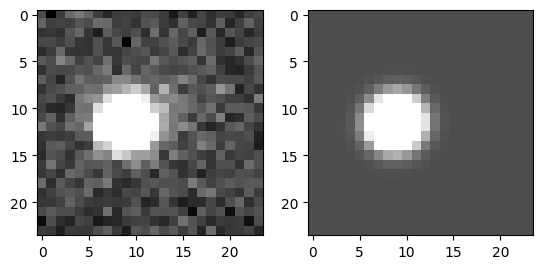

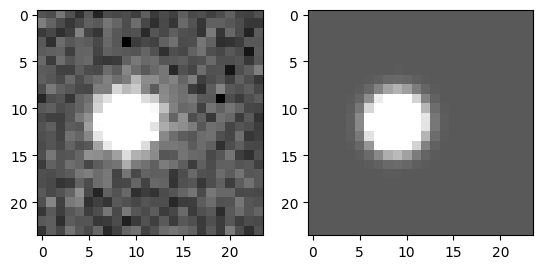

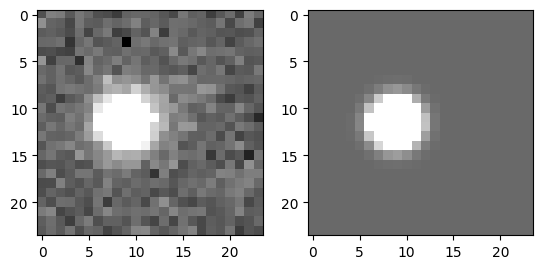

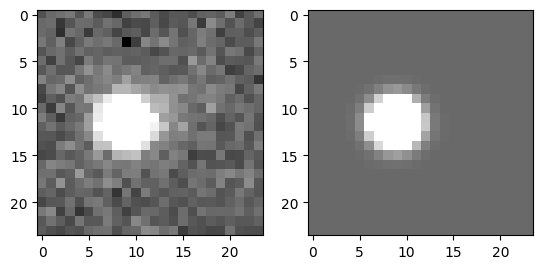

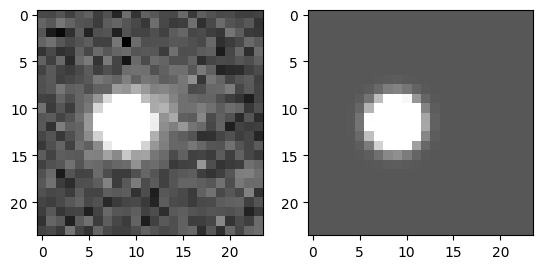

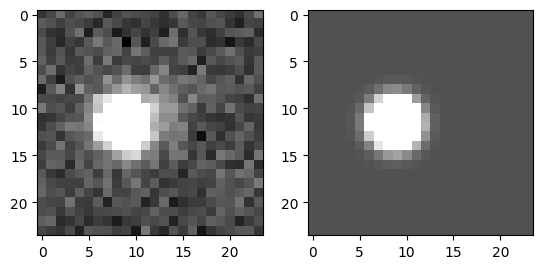

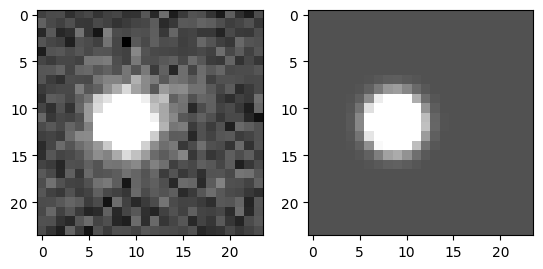

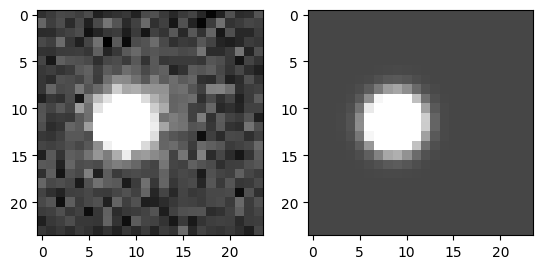

[1.00889491 0.96185773 0.98433646 0.95563135 0.86143531 0.84750492
 0.88356416 1.07886029 0.96450691 0.91911682 0.82758304 0.84716996
 0.80461674 0.85743771 0.8964326  0.94117509]
Target FWHM:  1.1
0.7386530915816335 0.18614057907857165


0.899361666456557 0.22663913994705237


0.8274159433399457 0.20850881772166632


0.9180171633215197 0.23134032515702296


1.152741191397332 0.29049078023212765


1.1817006543124664 0.29778856488674155


1.1041534961049484 0.278246681018447


0.3616645495053238 0.09113946647534159


0.8912683340913924 0.22459962019103089


1.018407415088428 0.25663866860228385


1.2211397144962892 0.30772720805306486


1.18238252027165 0.2979603951084558


1.2639749636156181 0.3185216908311358


1.1611741402024764 0.29261588333102406


1.0742940708754536 0.2707221058606143


0.9594915840287508 0.2417918791752452


/Users/rjassef/Impol_Blue_HotDOGs/Impol_BHDs_repo/W0204-0506_resolved/resolved_pol.py:220: RuntimeWarning: invalid value encountered in divide
  F = (fo-fe)/(fo+fe)
mkdir: stamps: File exists


-0.1 -90.5


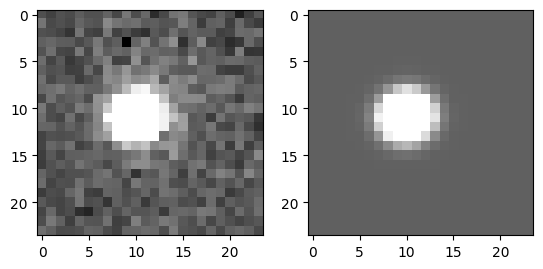

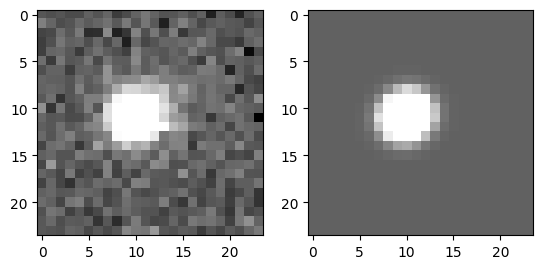

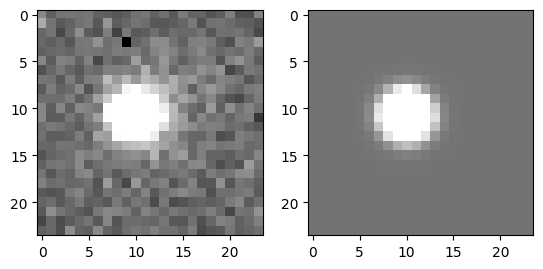

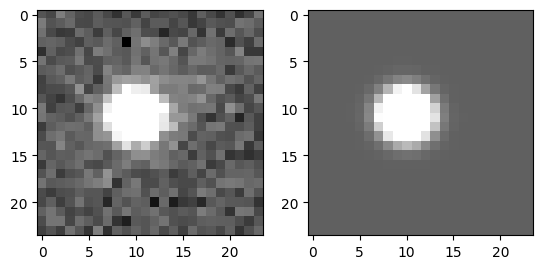

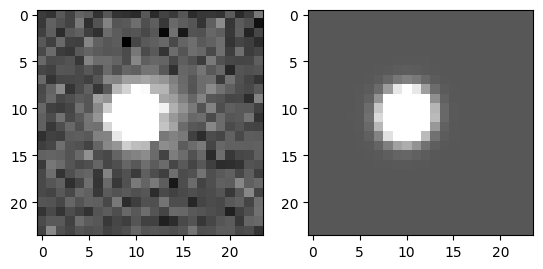

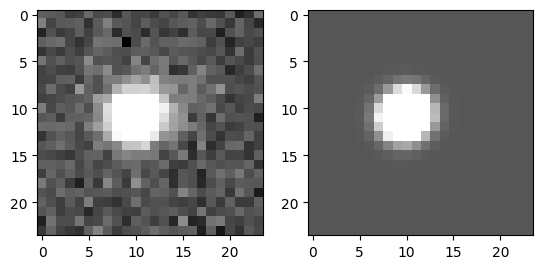

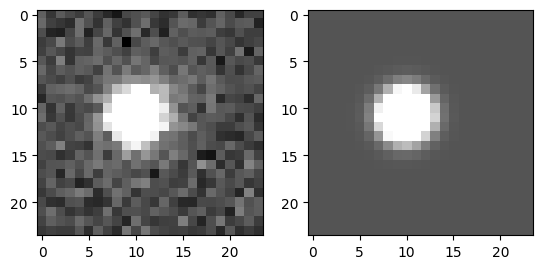

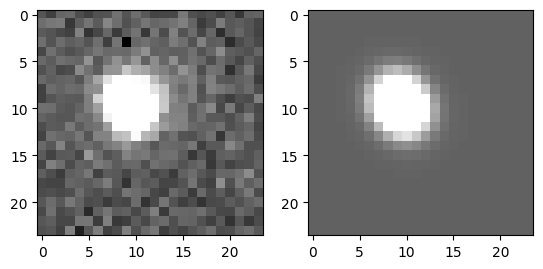

[0.88727781 0.83024074 0.86024342 0.91882313 0.85971491 0.87842894
 0.93291715 1.08604712]
Target FWHM:  1.1
1.095664074997603 0.276107346899396


1.216005822963689 0.3064334673868496


1.1552660310337672 0.29112703982050936


1.019159706992781 0.2568282461621808


1.1563827201125845 0.2914084454683713


1.1157283873497228 0.28116355361213013


0.982126684486361 0.24749592449056296


0.2943089167916927 0.07416584703150655


/Users/rjassef/Impol_Blue_HotDOGs/Impol_BHDs_repo/W0204-0506_resolved/resolved_pol.py:220: RuntimeWarning: invalid value encountered in divide
  F = (fo-fe)/(fo+fe)


In [3]:
rpos = list()
for k, mjd in enumerate(mjds):

    rpo = ResolvedPol(object=object, band=band, mjd=mjd)
    rpo.find_shift(ex_ref=source_ex_ref, ey_ref=source_ey_ref)
    print(rpo.dx_use, rpo.dy_use)

    stddev_0 = 3.0
    x_mean_0 = None
    if k==1:
        x_mean_0 = 8
    rpo.find_seeing(ex_ref=star_ex_ref, ey_ref=star_ey_ref, stddev_0=stddev_0, x_mean_0 = 8, show_plots=True)
    print(rpo.seeing)

    rpo.get_pol(regularize_psf=True)

    rpos.append(rpo)

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits
from astropy.visualization import ZScaleInterval, LinearStretch, ImageNormalize
from mpl_toolkits.axes_grid1 import make_axes_locatable

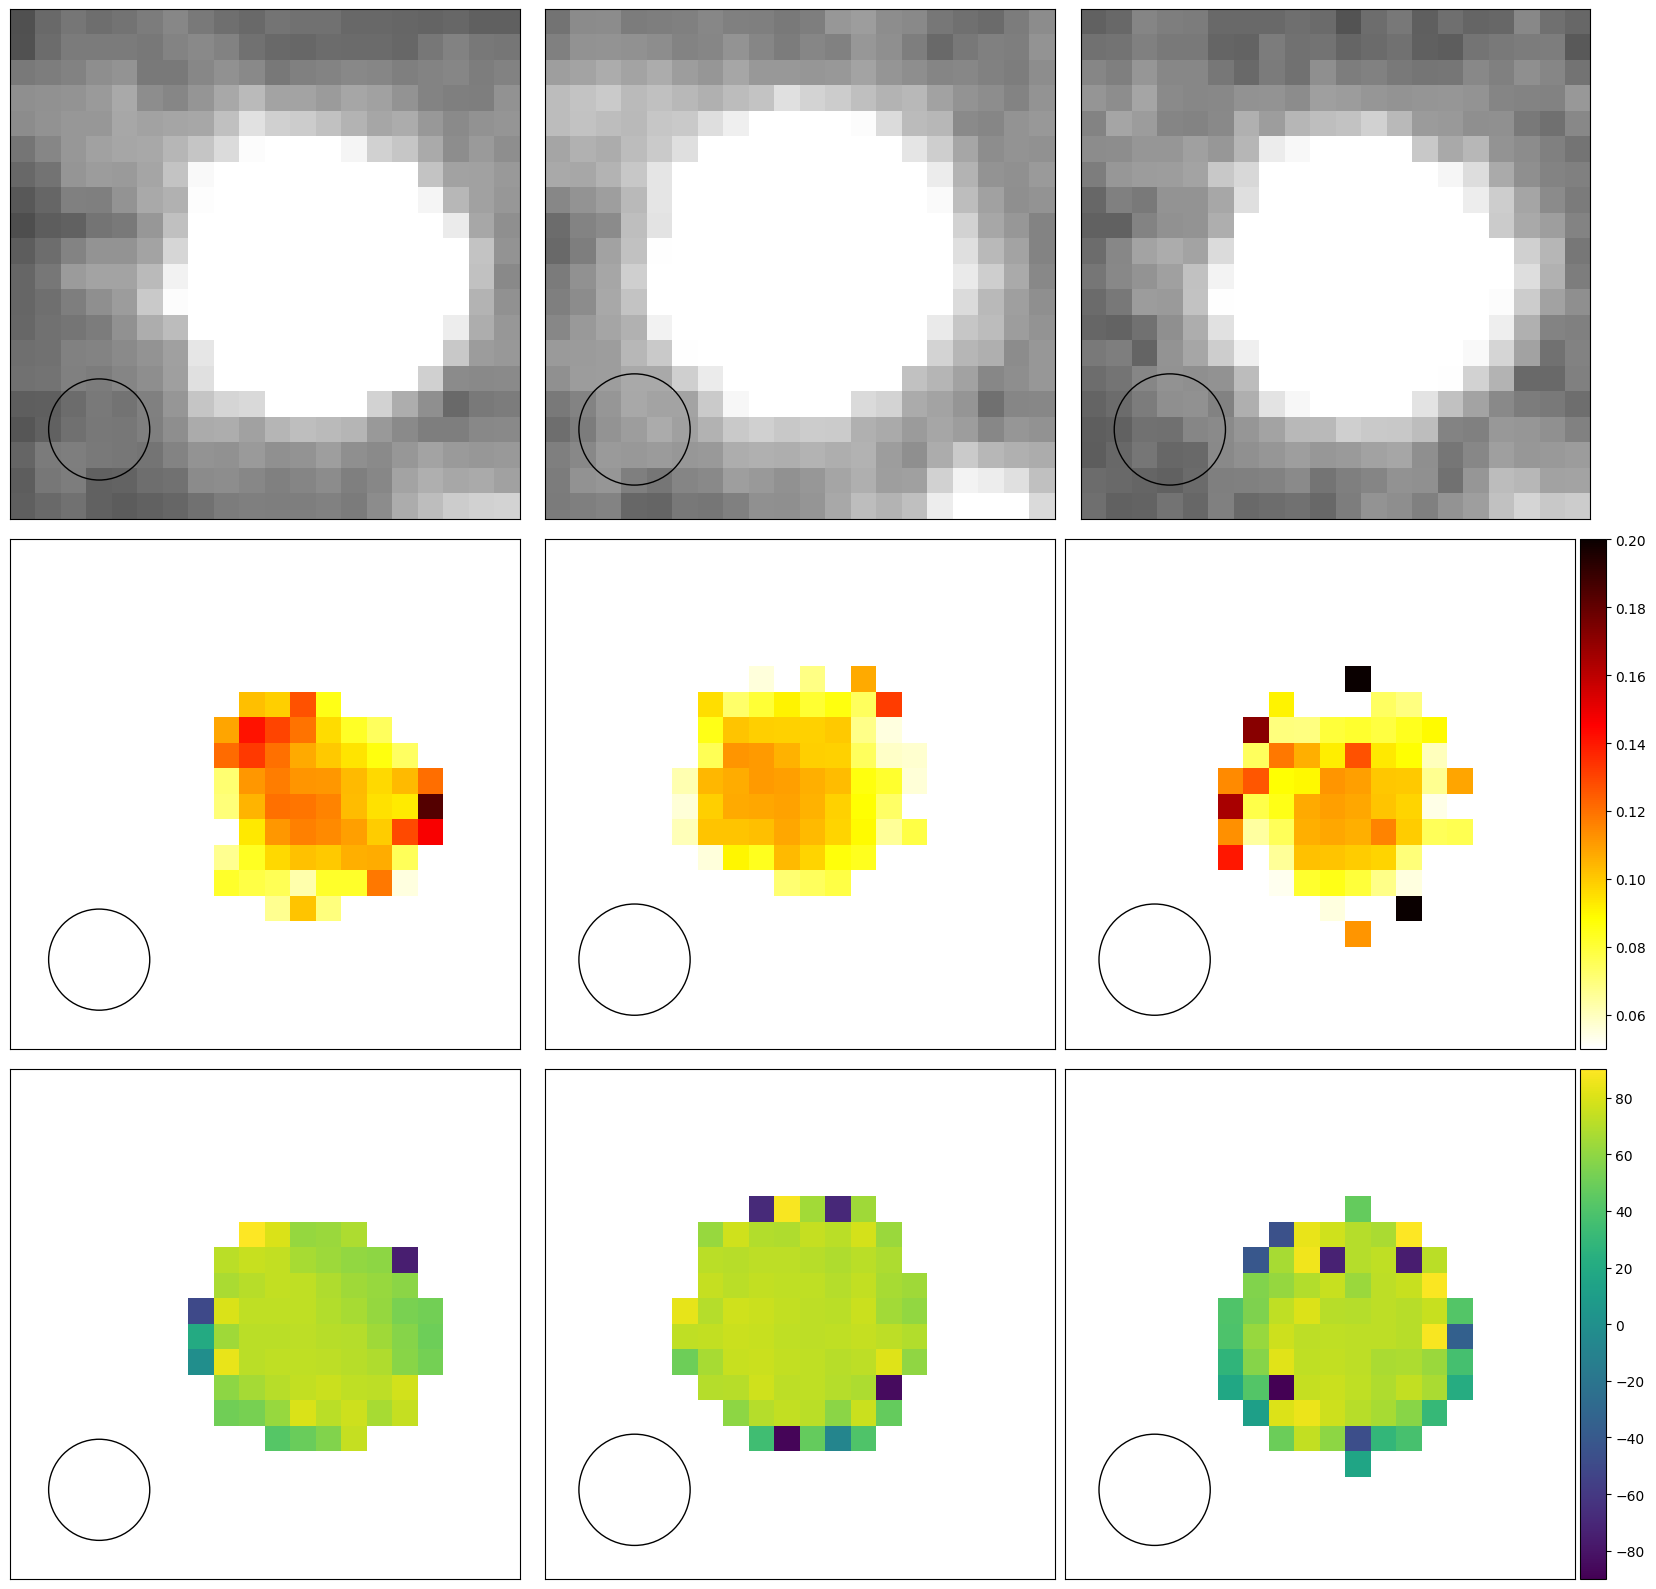

In [5]:
fig, axs = plt.subplots(3,3,figsize=(17,16), sharex=True, sharey=True)
#plt.subplots_adjust(hspace=0., wspace=0.)
plt.subplots_adjust(wspace=0.)
for ax in axs.flat:
    ax.set_yticklabels([])
    ax.set_xticklabels([])
    ax.set_yticks([])
    ax.set_xticks([])


stack1 = rpos[0].stack[1]
size = 20
ix1 = int(rpos[0].stack.shape[1]/2 - size/2)
ix2 = int(rpos[0].stack.shape[1]/2 + size/2)
iy1 = int(rpos[0].stack.shape[0]/2 + size/2)
iy2 = int(rpos[0].stack.shape[0]/2 - size/2)
#print(ix1, ix2, iy1, iy2)

norm1 = ImageNormalize(rpos[0].stack, stretch=LinearStretch(), interval=ZScaleInterval())
axs[0,0].imshow(rpos[0].stack[iy1:iy2:-1,ix1:ix2], norm=norm1, cmap='gray')

norm2 = ImageNormalize(rpos[1].stack, stretch=LinearStretch(), interval=ZScaleInterval())
axs[0,1].imshow(rpos[1].stack[iy1:iy2:-1,ix1:ix2], norm=norm2, cmap='gray')

norm3 = ImageNormalize(rpos[2].stack, stretch=LinearStretch(), interval=ZScaleInterval())
axs[0,2].imshow(rpos[2].stack[iy1:iy2:-1,ix1:ix2], norm=norm3, cmap='gray')

axs[1,0].imshow(rpos[0].pol_frac[iy1:iy2:-1,ix1:ix2], cmap='hot_r', vmin=0.05, vmax=0.2)
axs[1,1].imshow(rpos[1].pol_frac[iy1:iy2:-1,ix1:ix2], cmap='hot_r', vmin=0.05, vmax=0.2)
cm_pf = axs[1,2].imshow(rpos[2].pol_frac[iy1:iy2:-1,ix1:ix2], cmap='hot_r', vmin=0.05, vmax=0.2)
divider_pf = make_axes_locatable(axs[1,2])
cax_pf = divider_pf.append_axes("right", size="5%", pad=0.05)
fig.colorbar(cm_pf, cax=cax_pf)

axs[2,0].imshow(rpos[0].pol_angle[iy1:iy2:-1,ix1:ix2], cmap='viridis', vmin=-90, vmax=90)
axs[2,1].imshow(rpos[1].pol_angle[iy1:iy2:-1,ix1:ix2], cmap='viridis', vmin=-90, vmax=90)
cm_pa = axs[2,2].imshow(rpos[2].pol_angle[iy1:iy2:-1,ix1:ix2], cmap='viridis', vmin=-90, vmax=90)
divider_pa = make_axes_locatable(axs[2,2])
cax_pa = divider_pa.append_axes("right", size="5%", pad=0.05)
fig.colorbar(cm_pa, cax=cax_pa)

for j in range(3):
    for i in range(3):
        beam  = plt.Circle((size*0.15,size*0.8),rpos[i].target_fwhm_pix/2, color='k', fill=False)
        axs[j,i].add_patch(beam)

fig.tight_layout()
plt.show()